# Gotta catch 'em all!

### pokemon.csv

In this file, each row represents the features of one Pokémon.

* pid: Numeric - ID of the Pokémon
* HP: Numeric - Health points
* Attack: Numeric - Strength of the regular attack
* Defense: Numeric - Strength of the regular defense
* Sp. Atk: Numeric - Strength of the special attack
* Sp. Def: Numeric - Strength of the special defense
* Speed: Numeric - Moving speed
* Legendary: Boolean - ‘True’ if the Pokémon is rare
* Class 1: Categorical - Pokémon class
* Class 2: Categorical - Pokémon class

Please note that a Pokémon can have either one or two classes. If a Pokémon has two classes, they are both considered to have the same importance.

### combats.csv

In this file, each row represents the outcome of one battle between two Pokémon.

* First_pokemon: Numeric - ID (match with pid)
* Second_pokemon: Numeric - ID (match with pid)
* Winner: Numeric - ID of the winner

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pkmn = pd.read_csv('pokemon.csv')
pkmn.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [3]:
duels = pd.read_csv('combats.csv')
duels.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


## Question 1: Exploring the data
In this part, you will explore the data to address the curiosities of the demanding Professor Oak.

1. Explore the data and report some descriptive statistics (e.g., use df.describe(), report the number of classes, summarize the attack and defense distributions, etc.). This will be useful later in your analysis.

In [4]:
pkmn.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [5]:
print(pkmn['Class 1'].value_counts())
print(f"Number of classes: {pkmn['Class 1'].nunique()}")

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Dragon       32
Ghost        32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Class 1, dtype: int64
Number of classes: 18


In [6]:
print(pkmn['Class 2'].value_counts())
print(pkmn['Class 2'].nunique())

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Rock        14
Ghost       14
Ice         14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Class 2, dtype: int64
18


In [7]:
print(f"There are {pkmn['Class 2'].isna().sum()} single-class pokémon.")

There are 386 single-class pokémon.


In [8]:
print(pkmn['Legendary'].value_counts())

False    735
True      65
Name: Legendary, dtype: int64


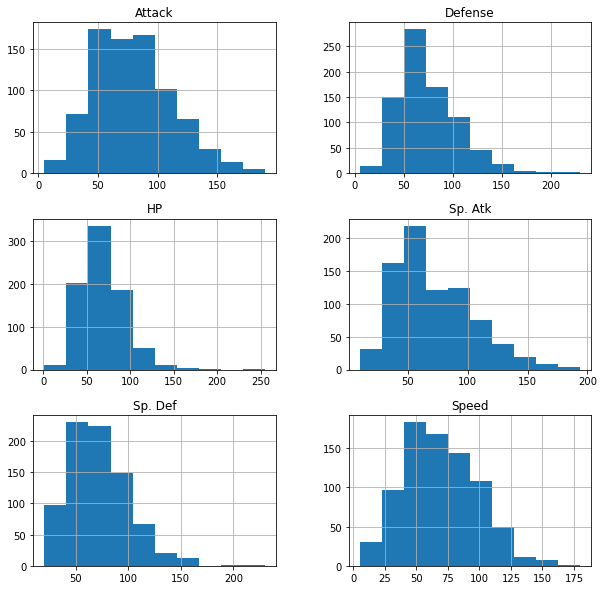

In [9]:
ax = pkmn[pkmn.describe().columns[1:]].hist(figsize=(10,10))

In [10]:
pkmn.corr() # I don't notice high correlations between features

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
pid,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.326715
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,1.000000


In [11]:
duels.shape, duels.nunique() # not all pokémon have been tried

((50000, 3), First_pokemon     784
 Second_pokemon    784
 Winner            783
 dtype: int64)

In [12]:
duels.Winner.value_counts() # pokémon sorted by which of them gets most victories

163    152
154    136
438    136
428    134
432    133
      ... 
189      5
237      4
639      4
190      3
290      3
Name: Winner, Length: 783, dtype: int64

2. Compare the probability distribution of the “regular attack” feature with that of the “regular defense” feature. In particular,
   1. visualize the relation between these two variables using an appropriate plot;
   2. list the names of the 3 Pokémon with highest attack-over-defense ratio;
   3. list the names of the 3 Pokémon with lowest attack-over-defense ratio;
   4. list the names of the 10 Pokémon with the largest number of victories.

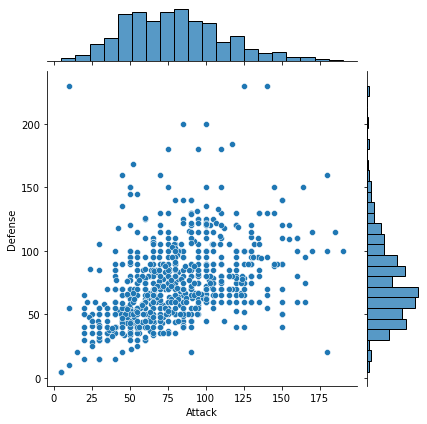

In [13]:
sns.jointplot(data=pkmn[['Attack','Defense']], x="Attack", y="Defense")

In [14]:
print('B - Names of the 3 Pokémon with highest attack-over-defense ratio:')
pkmn['Name'].reindex((pkmn['Attack']/pkmn['Defense']).sort_values(ascending=False)[:3].index)

B - Names of the 3 Pokémon with highest attack-over-defense ratio:


429    DeoxysAttack Forme
347              Carvanha
19          Mega Beedrill
Name: Name, dtype: object

In [15]:
print('C - Names of the 3 Pokémon with lowest attack-over-defense ratio:')
pkmn['Name'].reindex((pkmn['Attack']/pkmn['Defense']).sort_values()[:3].index)

C - Names of the 3 Pokémon with lowest attack-over-defense ratio:


230     Shuckle
139    Magikarp
484     Bronzor
Name: Name, dtype: object

In [16]:
print('D - Names of the 10 Pokémon with the largest number of victories:')
pkmn['Name'].reindex(duels.Winner.value_counts()[:10].index)

D - Names of the 10 Pokémon with the largest number of victories:


163          Mega Mewtwo X
154        Mega Aerodactyl
438                 Piplup
428    Deoxys Normal Forme
432                Turtwig
314                Nincada
214               Slowking
394                 Wynaut
249                Kingdra
155                Snorlax
Name: Name, dtype: object

3. Professor Oak suspects that Pokémon in the _grass_ class have a stronger regular attack than those in the _rock_ class. Check if he is right and convince him of your conclusion with statistical arguments.
   Note: If there are Pokémon that are in both classes, discard them.
   Note: You may assume that the distribution of the regular attack feature is normal for all Pokémon classes.

In [17]:
classes_combo = pd.Series(pkmn[['Class 1', 'Class 2']].values.tolist(), index=pkmn.index)
classes_combo.head()

0    [Grass, Poison]
1    [Grass, Poison]
2    [Grass, Poison]
3    [Grass, Poison]
4        [Fire, nan]
dtype: object

/Users/keymug/opt/anaconda3/envs/tenpct/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/keymug/opt/anaconda3/envs/tenpct/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


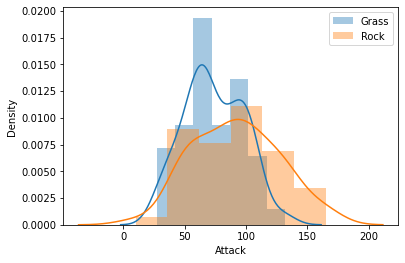

In [18]:
grass_attack = pkmn[[('Grass' in x and 'Rock' not in x) for x in classes_combo.values]]['Attack']
rock_attack = pkmn[[('Rock' in x and 'Grass' not in x) for x in classes_combo.values]]['Attack']
plt.figure()
sns.distplot(grass_attack, label='Grass')
sns.distplot(rock_attack, label='Rock')
plt.legend()

In [19]:
grass_attack.shape, rock_attack.shape

((93,), (56,))

Grass class doesn't look stronger than Rock class. The sample sizes are > 30, then we treat them as normal distributions.

In [20]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(grass_attack, rock_attack, equal_var=False) # two-sided Welch's t-test

In [21]:
t_statistic

-3.4169379582521513

In [22]:
print(p_value)
alpha = 0.05
if p_value/2 < alpha and t_statistic > 0: # one-sided test
    print('Reject null hypothesis for greater-than test.')
elif p_value/2 < alpha and t_statistic < 0:
    print('Reject null hypothesis for less-than test.')
else:
    print('Fail to reject null hypothesis for greater-than test.')

0.0009640546913545304
Reject null hypothesis for less-than test.


In [23]:
t_statistic, p_value = ttest_ind(rock_attack, grass_attack, equal_var=False) # two-sided
alpha = 0.05
if p_value/2 < alpha and t_statistic > 0: # one-sided test
    print('Reject null hypothesis for greater-than test.')
elif p_value/2 < alpha and t_statistic < 0:
    print('Reject null hypothesis for less-than test.')
else:
    print('Fail to reject null hypothesis for greater-than test.')

Reject null hypothesis for greater-than test.


So there was no statistical significance to assert that Grass attack is greater than Rock attack, but there is statistical significance to assert the opposite, i.e., that Rock attack is greater than Grass attack.

## Question 2: Prediction
Now that you know what your data looks like, you are ready to implement the prediction model for the Pokedex 2.0. The model should take as input the features of two Pokémon and generate a binary value to predict who will win.

1. Generate the feature vectors and the labels to train your model.
2. How does your model handle categorical features and Pokémon with multiple classes?
3. Train a random forest to predict the winner of a match based on the available features. To do so, split the full dataset randomly into a training set (90%) and a testing set (10%), and try different values of the number of estimators (`n_estimators`, try values 10, 25, 50, 100) and the maximum tree depth (`max_depth`, try values 2, 4, 10). Do this manually, without using any scikit-learn helpers.
4. Summarize and describe the results you obtain when training on 90% and testing on 10% of the data. What is the best combination of the two hyperparameters (number of estimators and maximum tree depth)?
5. Could the above training/testing setup potentially lead to wrong conclusions regarding the best hyperparameter setting? If so, describe why, and how you would address the problem. (Hint: think about how you’re making use of the data during training and testing).
6. Implement your solution to the problem you’ve identified in the previous subquestion (5), and show and describe your results.
7. Finally, Professor Oak wants to know what the most predictive features are. Plot feature importance as a bar plot representing the 10 most predictive variables.

Possible features:
- concatenate horizontally the feature rows of the 2 pokémon
    - this creates somehow duplicate information in different columns though
- difference of each pair of features for the 2 pokémon (e.g., difference of attacks, diff. of attack and defense)
    - making a very big one-hot for each possible combination of classes (it is well-known that some types are very weak against others, e.g., grass VS fire and fire VS water)
    - computing the squares or the log of those differences, to account for non-linear relationships between features and battle outcome

In [24]:
duels['labels'] = np.where(duels['Winner'] == duels['First_pokemon'], 0, 1)
duels.head(10)

,First_pokemon,Second_pokemon,Winner,labels
0,266,298,298,1
1,702,701,701,1
2,191,668,668,1
3,237,683,683,1
4,151,231,151,0
5,657,752,657,0
6,192,134,134,1
7,73,545,545,1
8,220,763,763,1
9,302,31,31,1


In [25]:
one_hot_classes = pd.get_dummies(classes_combo.apply(pd.Series).stack()).sum(level=0) # Answer to question 2.2

In [26]:
pkmn_features = pd.concat([pkmn['pid'], 
                           pkmn[pkmn.columns[4:]], 
                           (pkmn['Attack']/pkmn['Defense']).rename("AD ratio"), 
                           one_hot_classes.add_prefix('Class_')], axis=1)
pkmn_features.head()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,AD ratio,Class_Bug,...,Class_Ghost,Class_Grass,Class_Ground,Class_Ice,Class_Normal,Class_Poison,Class_Psychic,Class_Rock,Class_Steel,Class_Water
0,1,45,49,49,65,65,45,False,1.000000,0,...,0,1,0,0,0,1,0,0,0,0
1,2,60,62,63,80,80,60,False,0.984127,0,...,0,1,0,0,0,1,0,0,0,0
2,3,80,82,83,100,100,80,False,0.987952,0,...,0,1,0,0,0,1,0,0,0,0
3,4,80,100,123,122,120,80,False,0.813008,0,...,0,1,0,0,0,1,0,0,0,0
4,5,39,52,43,60,50,65,False,1.209302,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
battle_first = pkmn_features.set_index('pid').reindex(duels['First_pokemon'].values)
battle_first.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,AD ratio,Class_Bug,Class_Dark,...,Class_Ghost,Class_Grass,Class_Ground,Class_Ice,Class_Normal,Class_Poison,Class_Psychic,Class_Rock,Class_Steel,Class_Water
pid,,,,,,,,,,,,,,,,,,,,,
266,50,64,50,45,50,41,False,1.280000,0,0,...,0,0,1,0,0,0,0,1,0,0
702,91,90,72,90,129,108,True,1.250000,0,0,...,0,1,0,0,0,0,0,0,0,0
191,55,40,85,80,105,40,False,0.470588,0,0,...,0,0,0,0,0,0,0,0,0,0
237,40,40,40,70,40,20,False,1.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
151,70,60,125,115,70,55,False,0.480000,0,0,...,0,0,0,0,0,0,0,1,0,1


In [28]:
battle_second = pkmn_features.set_index('pid').reindex(duels['Second_pokemon'].values)
battle_second.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,AD ratio,Class_Bug,Class_Dark,...,Class_Ghost,Class_Grass,Class_Ground,Class_Ice,Class_Normal,Class_Poison,Class_Psychic,Class_Rock,Class_Steel,Class_Water
pid,,,,,,,,,,,,,,,,,,,,,
298,70,70,40,60,40,60,False,1.750000,0,1,...,0,1,0,0,0,0,0,0,0,0
701,91,129,90,72,90,108,True,1.433333,0,0,...,0,0,0,0,0,0,0,1,0,0
668,75,75,75,125,95,40,False,1.000000,0,0,...,0,0,0,0,0,0,1,0,0,0
683,77,120,90,60,90,48,False,1.333333,0,0,...,0,0,0,0,0,0,0,0,0,0
231,20,10,230,10,230,5,False,0.043478,1,0,...,0,0,0,0,0,0,0,1,0,0


In [29]:
battles = pd.concat([battle_first.reset_index().add_prefix('First_'), 
                     battle_second.reset_index().add_prefix('Second_')], 
                     axis=1).drop(['First_pid', 'Second_pid'], axis=1)
battles.head()

,First_HP,First_Attack,First_Defense,First_Sp. Atk,First_Sp. Def,First_Speed,First_Legendary,First_AD ratio,First_Class_Bug,First_Class_Dark,...,Second_Class_Ghost,Second_Class_Grass,Second_Class_Ground,Second_Class_Ice,Second_Class_Normal,Second_Class_Poison,Second_Class_Psychic,Second_Class_Rock,Second_Class_Steel,Second_Class_Water
0,50,64,50,45,50,41,False,1.280000,0,0,...,0,1,0,0,0,0,0,0,0,0
1,91,90,72,90,129,108,True,1.250000,0,0,...,0,0,0,0,0,0,0,1,0,0
2,55,40,85,80,105,40,False,0.470588,0,0,...,0,0,0,0,0,0,1,0,0,0
3,40,40,40,70,40,20,False,1.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
4,70,60,125,115,70,55,False,0.480000,0,0,...,0,0,0,0,0,0,0,1,0,0


### 2.3: Training as requested

In [30]:
duels['labels'].value_counts()

1    26399
0    23601
Name: labels, dtype: int64

In [31]:
np.random.seed(0)
test_ind = np.random.choice(battles.shape[0], int(battles.shape[0]/10), replace=False)

In [32]:
test_set = battles.reindex(test_ind)
test_labels = duels['labels'].reindex(test_ind)
test_set.shape

(5000, 52)

In [33]:
train_set = battles.drop(test_ind, axis=0)
train_labels = duels.drop(test_ind, axis=0)['labels']
train_set.shape

(45000, 52)

I don't want to use the test set as validation set (bad practice), so I will add a k-fold validation in the training phase that works as validation set.

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

rndm_state = 12

# Initialisation
winner_param = {'n_estimators': 0, 'max_depth': 0}
estim_param = [10, 25, 50, 100]
depth_param = [2, 4, 10]
best_result = 0

# Hand-made grid search
for ne in estim_param:
    for md in depth_param:
        fold_scores = []
        kf = KFold(n_splits=10, random_state=rndm_state, shuffle=True)
        kf.get_n_splits(train_set)
        for train_index, test_index in kf.split(train_set):
            X_train, X_test = train_set.values[train_index], train_set.values[test_index]
            y_train, y_test = train_labels.values[train_index], train_labels.values[test_index]
            clf = RandomForestClassifier(n_estimators=ne, max_depth=md, random_state=rndm_state)
            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            fold_acc = accuracy_score(y_test, y_pred)
            fold_scores.append(fold_acc)
        trial_score = np.mean(fold_scores)
        print(trial_score) # print intermediate results
        if trial_score > best_result:
            best_result = trial_score
            winner_param['n_estimators'] = ne
            winner_param['max_depth'] = md
        else:
            pass

0.796688888888889
0.8344888888888888
0.9009555555555554
0.7868222222222223
0.8260666666666665
0.9092666666666667
0.7871111111111111
0.8353111111111111
0.9118666666666666
0.7874888888888889
0.8388222222222221
0.9136222222222223


In [35]:
print(f"2.4 - The best combination of parameters is {winner_param}, the cross validation accuracy score is {round(best_result, 3)}.")

2.4 - The best combination of parameters is {'n_estimators': 100, 'max_depth': 10}, the cross validation accuracy score is 0.914.


In [36]:
clf = RandomForestClassifier(**winner_param, random_state=rndm_state)
clf.fit(train_set.values, train_labels.values)
y_pred = clf.predict(test_set.values)
test_acc = accuracy_score(test_labels.values, y_pred)
print(f'Accuracy on test set is {test_acc}')

Accuracy on test set is 0.9134


#### 2.5
I set the test set aside in order to avoid data leakage.

On the other hand, the fact that we are randomly sampling the test set means that it could contain pokémon that the model has already seen. For example if the model sees Mewtwo in the training set, it is easy for it to guess that it will win in battles in the test set, same thing for Magikarp which is likely to loose any battle.

For this reason, I think a more clever approach should be to use a group-fold method, leaving some unseen pokémon in the test set, so the model only uses the features (and not their known combination) to predict the outcome.
#### 2.6

In [37]:
duels_ids = pd.Series(duels[['First_pokemon', 'Second_pokemon']].values.tolist(), index=duels.index)
duels_ids.head()

0    [266, 298]
1    [702, 701]
2    [191, 668]
3    [237, 683]
4    [151, 231]
dtype: object

Create a random permutation of the 800 Pokémon to be used as test set and as group k-folds.
Each fold will have 100 Pokémon, so 1 test set + 7 folds in training.

In [38]:
np.random.seed(rndm_state)
pkmn_permutation = np.random.permutation(pkmn['pid'])

In [39]:
test_pkmn_ind = list(pkmn_permutation[:100])
len(test_pkmn_ind)    

100

In [40]:
group_folds = {}
for i in range(1,8):
    group_folds[i-1] = list(pkmn_permutation[i*100:(i+1)*100])

In [41]:
def drop_pkmn_from_duels(pkmn_ind, duels_ids):
    duels_clean = [d if (d[0] not in pkmn_ind and d[1] not in pkmn_ind) else None for d in duels_ids]
    duels_train_set = pd.Series(duels_clean, index=duels_ids.index)
    duels_test_set = duels_ids.loc[duels_train_set.isna()]
    return duels_train_set.dropna(), duels_test_set

In [42]:
duels_train_set, duels_test_set = drop_pkmn_from_duels(test_pkmn_ind, duels_ids)
duels_ids.shape, duels_train_set.shape, duels_test_set.shape

((50000,), (38177,), (11823,))

In [43]:
test_set = battles.reindex(duels_test_set.index)
test_labels = duels['labels'].reindex(duels_test_set.index)
test_set.shape

(11823, 52)

In [44]:
train_set = battles.reindex(duels_train_set.index)
train_labels = duels['labels'].reindex(duels_train_set.index)
train_set.shape

(38177, 52)

In [45]:
# Initialisation
winner_param = {'n_estimators': 0, 'max_depth': 0}
estim_param = [10, 25, 50, 100]
depth_param = [2, 4, 10]
best_result = 0

# Hand-made grid search
for ne in estim_param:
    for md in depth_param:
        fold_scores = []
        for k, ind_list in group_folds.items():
            duels_train, duels_test = drop_pkmn_from_duels(ind_list, duels_train_set)
            X_train = train_set.reindex(duels_train.index).values
            X_test = train_set.reindex(duels_test.index).values
            y_train = train_labels.reindex(duels_train.index).values
            y_test = train_labels.reindex(duels_test.index).values
            
            clf = RandomForestClassifier(n_estimators=ne, max_depth=md, random_state=rndm_state)
            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            fold_acc = accuracy_score(y_test, y_pred)
            fold_scores.append(fold_acc)
        trial_score = np.mean(fold_scores)
        print(trial_score) # print intermediate results
        if trial_score > best_result:
            best_result = trial_score
            winner_param['n_estimators'] = ne
            winner_param['max_depth'] = md
        else:
            pass

0.789152952455935
0.8303852231604888
0.8876315864769647
0.782124472056381
0.8221565356715564
0.8937914924054101
0.7838864756025631
0.8306864950089635
0.8978618378645888
0.7815183605474941
0.8325218692811297
0.8990062149499568


In [46]:
print(f"2.6 - The best combination of parameters is {winner_param}, the cross validation accuracy score is {round(best_result, 3)}.")

2.6 - The best combination of parameters is {'n_estimators': 100, 'max_depth': 10}, the cross validation accuracy score is 0.899.


In [47]:
clf = RandomForestClassifier(**winner_param, random_state=rndm_state)
clf.fit(train_set.values, train_labels.values)
y_pred = clf.predict(test_set.values)
test_acc = accuracy_score(test_labels.values, y_pred)
print(f'Accuracy on test set is {test_acc}')

Accuracy on test set is 0.9171107164002368


The improvement of the result on the test set is very modest, but the current test set is more than twice the size of the previous test set. 

The process that we followed ensures that the model is able to infer on unseen pokemon. Indeed, it was able to obtain high accuracy on the test set even if the cross validation score was lower than the first time (see 2.4), so I feel more confident that this model is able to generalise.

Since this dataset has ~50 columns, the results could be improved with a more complex set of parameters (200 estimators and 20 max depth) which allows the trees to explore the space more in depth; otherwise I should craft more complex features, so that the random forest start with a set of processed features that saves some iterations to separate the decision space.

#### 2.7

Text(0.5, 1.0, 'Feature importance of the 10 most predictive variables')

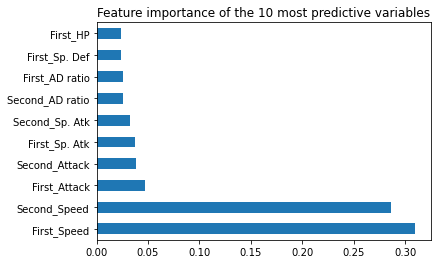

In [48]:
ax = pd.Series(clf.feature_importances_, index=train_set.columns).sort_values(ascending=False)[:10].plot.barh()
ax.set_title('Feature importance of the 10 most predictive variables')

## Question 3: Ranking
Something the new Pokedex is missing is a smart way of ranking the Pokémon. As the dataset Professor Oak gave you contains the outcome of a large number of battles, the idea is to use this data to come up with a way of sorting the Pokémon from strongest to weakest.
1. Compute the winning ratio (number of wins divided by number of battles) for all Pokémon. Show the 10 Pokémon with the highest ratio and describe what they have in common with respect to their features. Discuss your results about feature importance from question 2.7 (regarding feature importance) in this context.

Pokémon tournaments can be represented as a so-called _dominance graph_. The dominance graph is a directed graph in which each Pokémon is represented by one vertex, and directed edges point from stronger to weaker Pokémons: in particular, if Pokémon _i_ has won a strictly larger number of times against Pokémon _j_ than _j_ has won against _i_ (that is, if _i_ dominates _j_), there is a directed edge pointing from node _i_ to node _j_. The dominance graph can be represented as an adjacency matrix _G_ where entry _G_<sub>_ij_</sub> is 1 if there is an edge pointing from _i_ to _j_, and 0 otherwise.

2. A simple method for identifying the strongest Pokémon using this graph is to compute the matrix _A_ = _G_ + _G_<sup>2</sup>. Consider a given row of _A_; summing up all elements of that row results in a dominance score for the respective Pokémon. Explain what this score represents and why it may be interpreted as capturing the dominance of a Pokémon.
3. Compute _A_ and extract the 10 Pokémon with the highest dominance score.
4. Compare the ranking by dominance scores with the ranking by winning ratio (cf. subquestion 1 above). What do you observe? How do you explain the differences (if any)?
5. Professor Oak is really keen on featuring a solid ranking mechanism in the new Pokedex, so you need to make a decision: Which scoring method is better, that based on winning ratio or that based on dominance scores? Support your opinion with explanations and examples.

In [49]:
num_of_battles = duels['First_pokemon'].value_counts() + duels['Second_pokemon'].value_counts()
num_of_wins = duels['Winner'].value_counts()
num_of_battles, num_of_wins = num_of_battles.align(num_of_wins, join='outer') # to account for pokémon who always lost
num_of_wins.fillna(0, inplace=True)
winning_ratio = num_of_wins/num_of_battles

In [50]:
print('The 10 Pokémon with the highest winning ratio:')
pd.concat([pkmn.set_index('pid').loc[winning_ratio.sort_values(ascending=False)[:10].index]['Name'], 
           winning_ratio.sort_values(ascending=False)[:10].rename('Winning ratio')], axis=1)

The 10 Pokémon with the highest winning ratio:


,Name,Winning ratio
155,Mega Aerodactyl,0.984496
513,Weavile,0.974790
704,Tornadus Therian Forme,0.968000
20,Mega Beedrill,0.966387
154,Aerodactyl,0.964539
477,Mega Lopunny,0.961240
727,Greninja,0.960630
717,Meloetta Pirouette Forme,0.959350
165,Mega Mewtwo Y,0.952000
350,Mega Sharpedo,0.950000


In [51]:
pkmn.set_index('pid').loc[winning_ratio.sort_values(ascending=False)[:10].index]

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,False
513,Weavile,Dark,Ice,70,120,65,45,85,125,False
704,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,True
20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,False
477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False
727,Greninja,Water,Dark,72,95,67,103,71,122,False
717,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,False
165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,True
350,Mega Sharpedo,Water,Dark,70,140,70,110,65,105,False


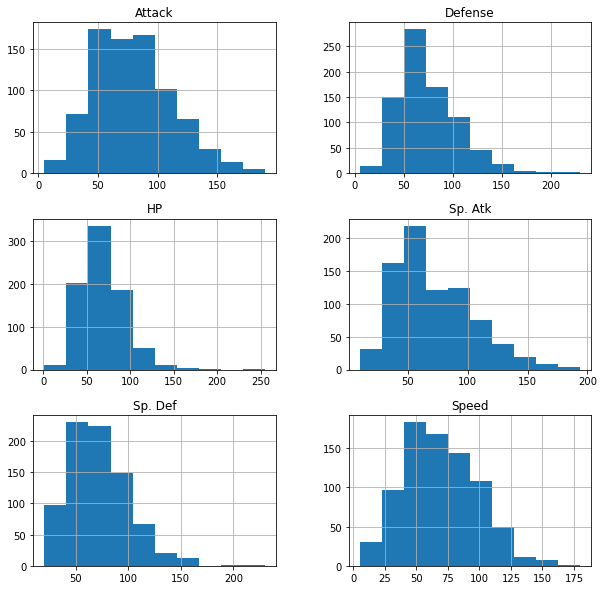

In [52]:
ax = pkmn[pkmn.describe().columns[1:]].hist(figsize=(10,10))

3.1 - Comparing the features of the 10 pokémon with the highest winning ratio and the distribution of those features across the dataset, we can see that they are among the pokémon in the highest bins of the Speed distribution histogram. Speed is indeed by far the strongest predictor in the model trained to predict battle outcomes.
They also have quite high Attack, while they have average values of Defense.

3.2 I don't see how _G_<sup>2</sup> can be different from G and make A any different than 2\*G.

When summing the entries of a row in G or A, we obtain the number of edges departing from that row and therefore have a measure of the number of pokémon that the selected one can defeat.

In [53]:
mini_G = np.array([[0, 1 , 0], # 1 defeats 2
                   [0, 0, 0],  # lowest dominance
                   [1, 1, 0]]) # 3 defeats 1 and 2, so it has a higher sum by row and higher dominance
mini_G + mini_G*mini_G # A

array([[0, 2, 0],
       [0, 0, 0],
       [2, 2, 0]])

In [59]:
duel_mat = np.zeros((800,800))

For loop to count if Pokémon _i_ has won a strictly larger number of times against Pokémon _j_ than _j_ has won against _i_.
Every _i_ win gets assigned a +1, every _j_ win gets assigned -1, so if the final number is > 0, _i_ dominates, if the final number is < 0, _j_ dominates.

In [55]:
def assign_winner(first, second, winner):
    if first == winner:
        return +1
    else:
        return -1

In [56]:
win_counts = {}
for index, row in duels.iterrows():
    duel_string = str(row['First_pokemon']) + ',' + str(row['Second_pokemon'])
    inverse_duel_string = str(row['Second_pokemon']) + ',' + str(row['First_pokemon'])
    if duel_string in win_counts: # check if duel has already being recorded
        win_counts[duel_string] = win_counts[duel_string] + assign_winner(row['First_pokemon'], 
                                                                          row['Second_pokemon'], row['Winner'])
    elif inverse_duel_string in win_counts: # check if inverse duel has been recorded
        win_counts[inverse_duel_string] = win_counts[inverse_duel_string] + assign_winner(row['Second_pokemon'],
                                                                                          row['First_pokemon'],
                                                                                          row['Winner'])
    else: # create the entry
        win_counts[duel_string] = assign_winner(row['First_pokemon'], row['Second_pokemon'], row['Winner'])

In [57]:
len(win_counts.items())

46226

In [60]:
for k, v in win_counts.items():
    pokemon_pair = [int(p) for p in k.split(',')]
    if v > 0:
        duel_mat[pokemon_pair[0]-1, pokemon_pair[1]-1]=1 # row i dominates on column j (First pokemon over Second)
    elif v < 0:
        duel_mat[pokemon_pair[1]-1, pokemon_pair[0]-1]=1 # row j dominates on column i (Second pokemon over First)

**Warning**: the method I used to build this matrix doesn't account for second-level edges: because if we record that A is stronger than B, and that B is stronger than C, we should maybe add an edge to record that A is also stronger than C. But that could be false if we count the Class (as in the game of rock, paper, scissors)

In [61]:
G = duel_mat
duel_mat = G + G*G

In [62]:
A = pd.DataFrame(duel_mat, index = pkmn['Name'])

In [63]:
print('3.3 - 10 Pokémon with highest dominance score')
A.sum(axis=1).sort_values(ascending=False)[:10]

3.3 - 10 Pokémon with highest dominance score


Name
Mewtwo                276.0
Aerodactyl            250.0
Deoxys Speed Forme    250.0
Jirachi               248.0
Murkrow               242.0
Mega Absol            240.0
Mega Houndoom         240.0
Mega Aerodactyl       238.0
Mega Rayquaza         236.0
Mega Mewtwo X         236.0
dtype: float64

In [64]:
A.sum(axis=1).sort_values()[:20]

Name
Ursaring                0.0
Poliwag                 0.0
Shuckle                 0.0
Hariyama                0.0
Mega Latias             0.0
Jellicent               0.0
Ariados                 0.0
Servine                 0.0
Magneton                0.0
Sandshrew               0.0
Wigglytuff              0.0
Honchkrow               0.0
Ditto                   0.0
Blastoise               0.0
Maractus                0.0
Victreebel              0.0
Pumpkaboo Small Size    0.0
Togepi                  6.0
Silcoon                 6.0
Wooper                  8.0
dtype: float64

In [65]:
pd.concat([pkmn.set_index('pid').loc[winning_ratio.sort_values()[:10].index]['Name'], 
           winning_ratio.sort_values()[:10].rename('Winning ratio')], axis=1)

,Name,Winning ratio
231,Shuckle,0.000000
290,Silcoon,0.021739
190,Togepi,0.024590
639,Solosis,0.031008
237,Slugma,0.032520
577,Munna,0.039062
189,Igglybuff,0.043478
395,Wynaut,0.046154
210,Wooper,0.048000
292,Cascoon,0.052632


**3.4** - Dominance scores and winning ratio rankings differ, although they don't tell such different stories at the top of the rankings (Mega Aerodactyl ranks high in both cases).

The difference is higher when we consider the last positions of the rankings: because the pokemons at the bottom of the winning ratio still might have won some battles and we don't learn much about their strength. While the pokémons at the bottom of the dominance ranking have consistenly lost all battles OR we don't have any information about them because they didn't appear in the duels (not all 800 pokémon are featured in the duels dataset).

I suspect that winning ratio might suffer from data collection bias: meaning that if a lot of winning (or losing) duels have been recorded for a pokémon, it gets listed as stronger (or weaker), while in dominance score it's about facing multiple different pokémons, irrespective of the number of duels recorded.

The way I built the dominance matrix is missing some information, because I left zeros in the row-column pairs for which there was no information (no battles recorded), so it might need some refinement.

So if the data collected is not complete, the dominance matrix has problems being very sparse.

In [66]:
print(f'There are no duels recorded for {800 - len(num_of_battles)} pokémon.')

There are no duels recorded for 16 pokémon.


**3.5** - I think the dominance score should be used, but it will be missing some information until more data that covers all pokémon is collected, and/or until a better implementation of it is written. 

A possible solution to the problem of not having a battle recorded for every possible pair of pokémon (i.e., every element of the matrix, 800<sup>2</sup> combinations in total), is to predict the outcome of the missing battles with the model we have built.

So we could release the pokédex putting a special flag on the pokémons for which data was missing, informing the user that the ranking has been completely or partially estimated. In the future, more real data can be collected and integrate the predicted information.